In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./Downloads/datasets/car_evaluation.csv')
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [3]:
df.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [4]:
df.loc[df.duplicated()]

,vhigh,vhigh.1,2,2.1,small,low,unacc


In [5]:
col_names = ['Buying price','Maintainance Cost', 'Doors','Persons','Lug_boot','Safety','Class']
df.columns = col_names
df.head()

,Buying price,Maintainance Cost,Doors,Persons,Lug_boot,Safety,Class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [6]:
df['Class'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: Class, dtype: int64

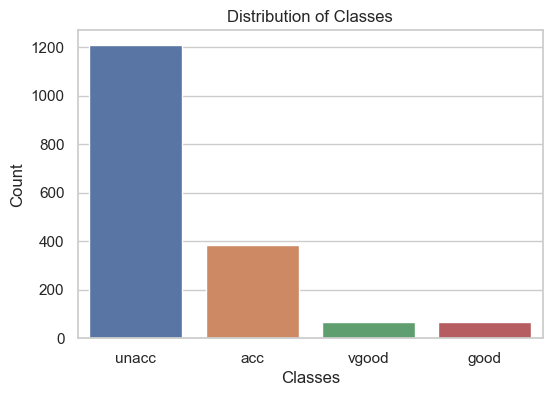

In [7]:
sns.set(style = "whitegrid")
plt.figure(figsize=(6,4))
sns.countplot(x= 'Class', data = df)
plt.title("Distribution of Classes")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

### 

###### As we can see, the dataset is highly imbalanced. So, the possibility of underfittinmg (High Bias) is very high. 

In [15]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()


X, y = df.drop('Class', axis=1), df['Class']

X_encoded = X.apply(lambda col: label_encoder.fit_transform(col) if col.dtype == 'object' else col)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Train the model on the training set
dt_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# You can also print other metrics like a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9710982658959537
Classification Report:
              precision    recall  f1-score   support

         acc       0.96      0.95      0.95        77
        good       0.75      0.80      0.77        15
       unacc       1.00      1.00      1.00       237
       vgood       0.83      0.88      0.86        17

    accuracy                           0.97       346
   macro avg       0.89      0.91      0.90       346
weighted avg       0.97      0.97      0.97       346



Comment: Although the overall accuracy is great, it's important to consider the impact of the imbalanced dataset. We'll explore if using Stratified K-Fold Cross-Validation provides a more reliable evaluation, particularly in handling class imbalances.

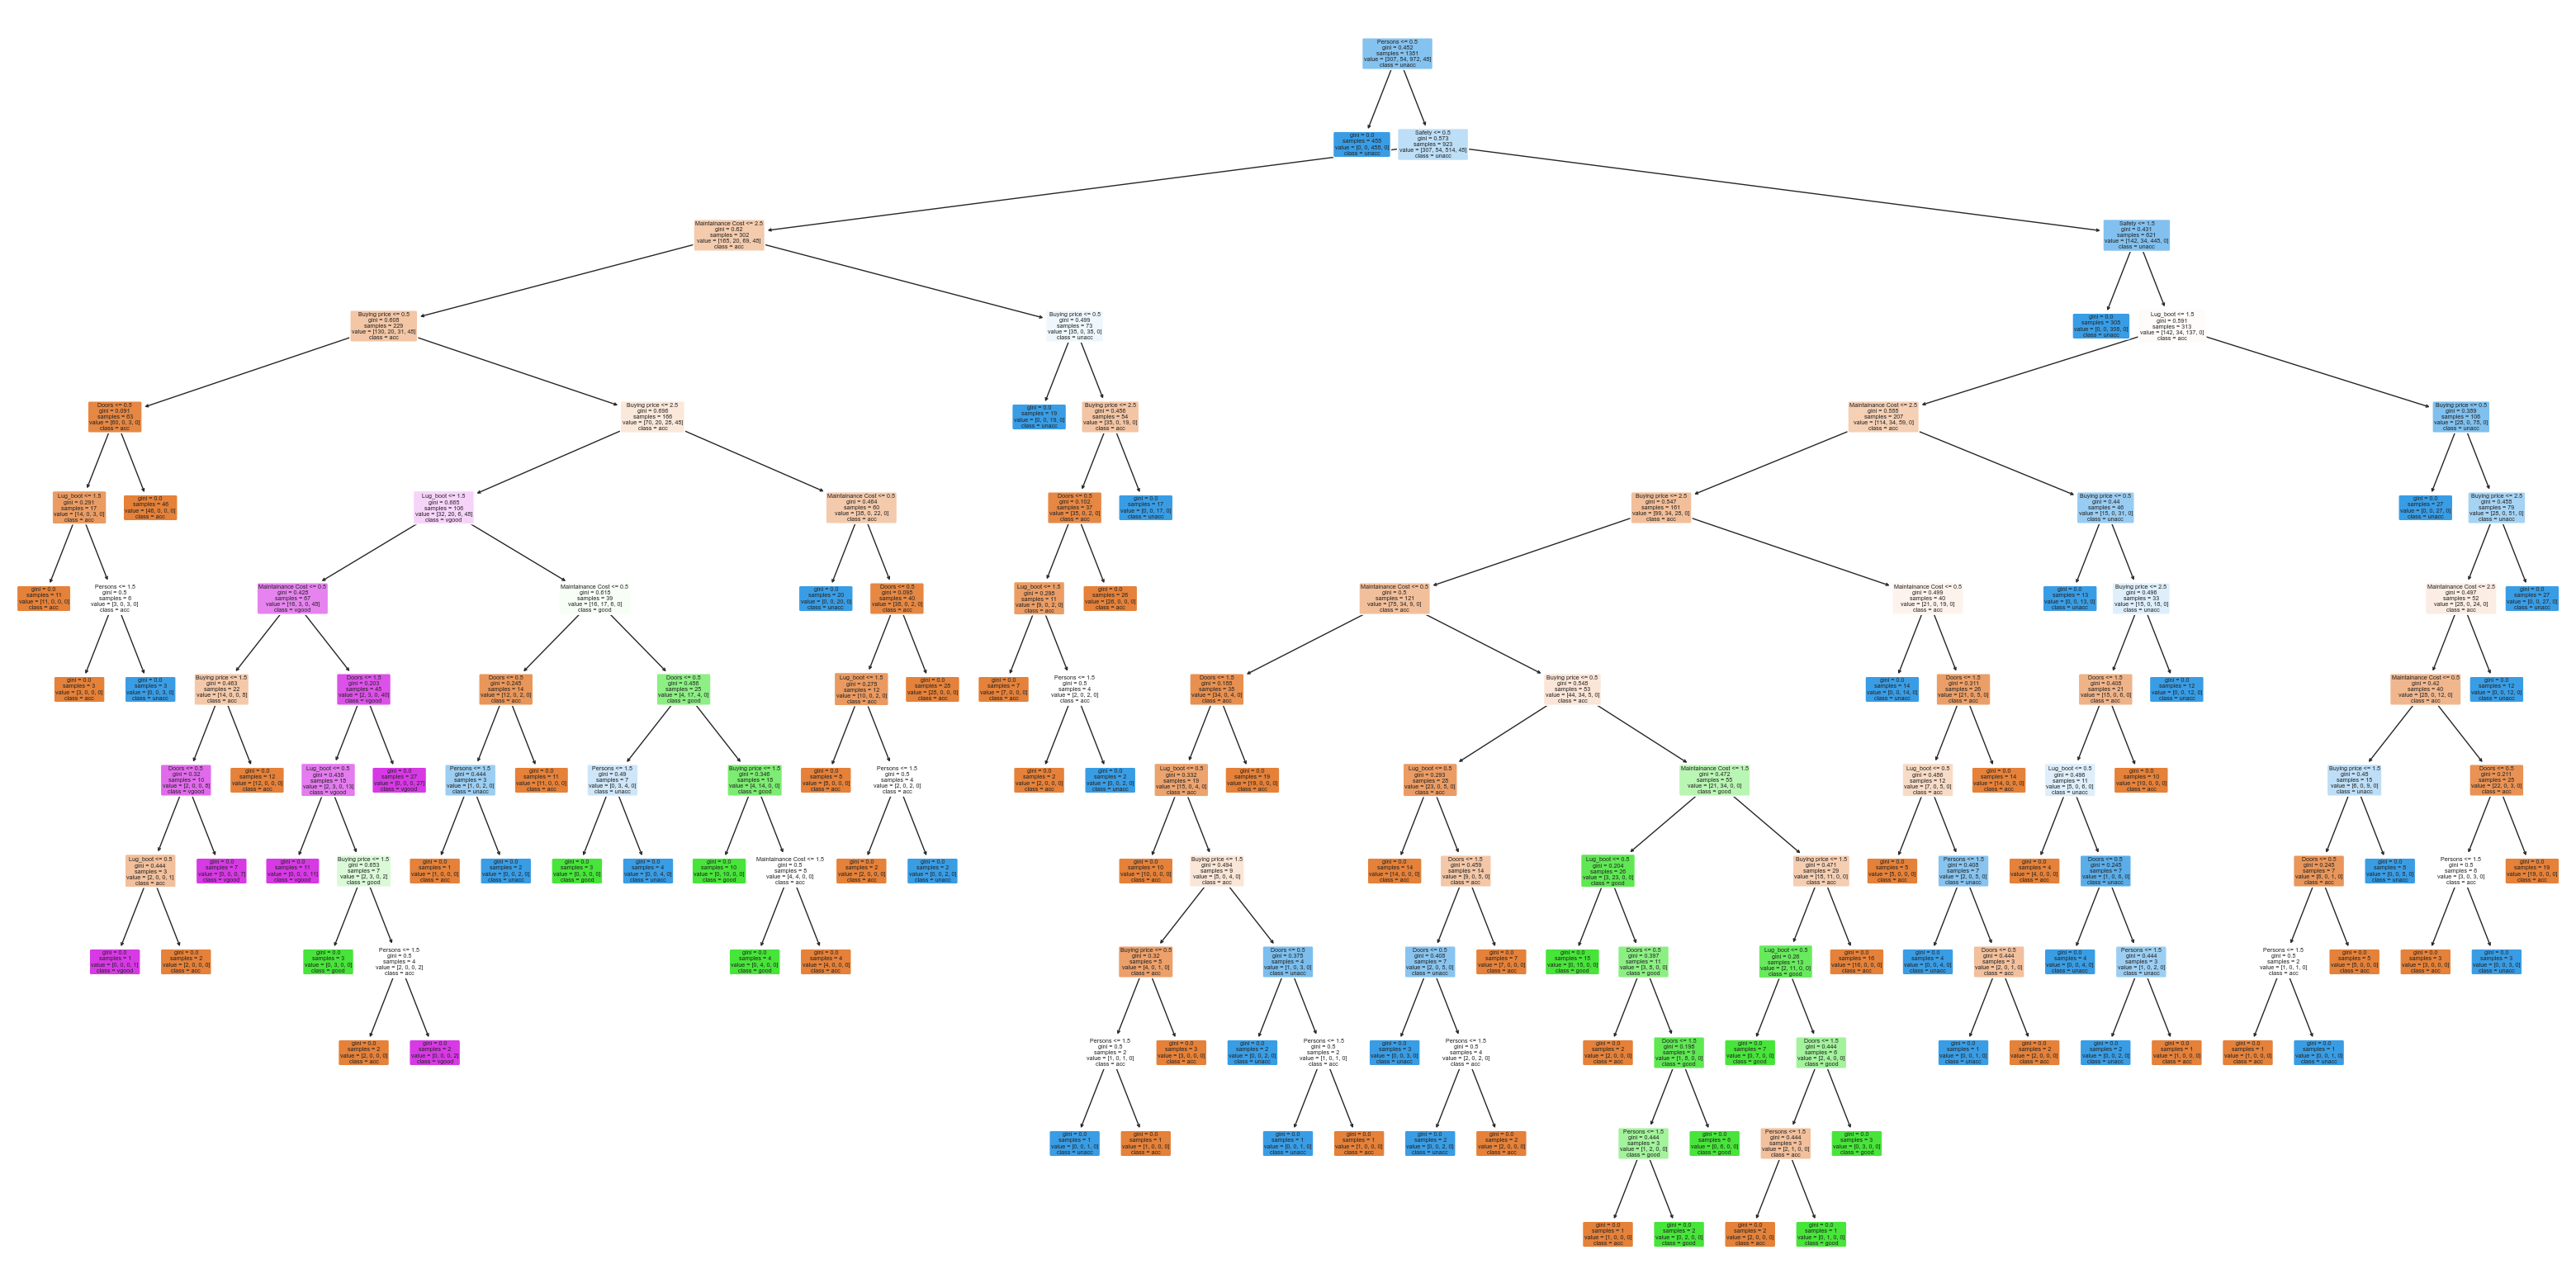

In [21]:
from sklearn.tree import plot_tree

plt.figure(figsize=(40, 20))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=dt_classifier.classes_, rounded=True)
plt.show()

Classification Report for Fold:
              precision    recall  f1-score   support

         acc       0.89      0.94      0.91        77
        good       1.00      1.00      1.00        14
       unacc       0.99      0.97      0.98       242
       vgood       0.85      0.85      0.85        13

    accuracy                           0.96       346
   macro avg       0.93      0.94      0.93       346
weighted avg       0.96      0.96      0.96       346

-----


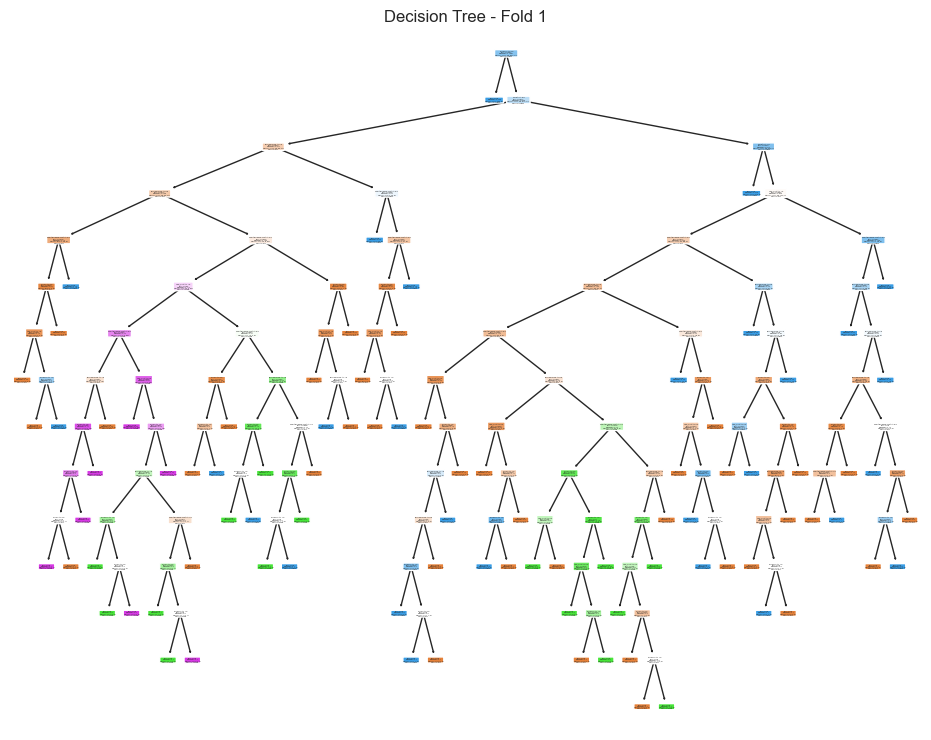

Classification Report for Fold:
              precision    recall  f1-score   support

         acc       0.95      0.96      0.95        77
        good       0.85      0.79      0.81        14
       unacc       1.00      1.00      1.00       242
       vgood       0.93      1.00      0.96        13

    accuracy                           0.98       346
   macro avg       0.93      0.94      0.93       346
weighted avg       0.98      0.98      0.98       346

-----


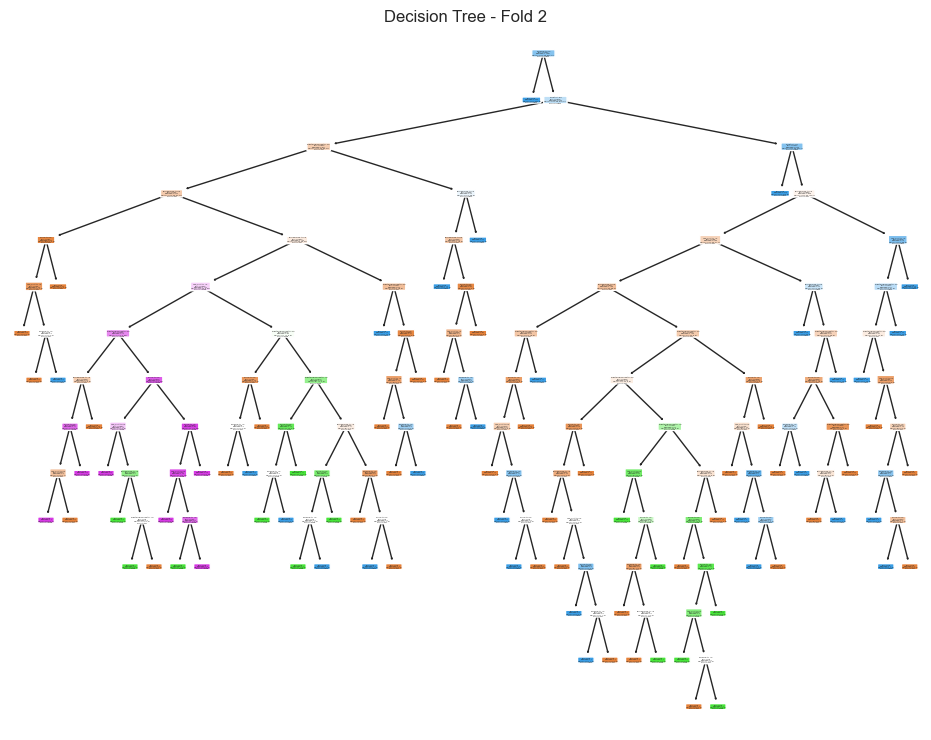

Classification Report for Fold:
              precision    recall  f1-score   support

         acc       0.95      1.00      0.97        77
        good       1.00      0.85      0.92        13
       unacc       1.00      0.99      1.00       242
       vgood       1.00      1.00      1.00        13

    accuracy                           0.99       345
   macro avg       0.99      0.96      0.97       345
weighted avg       0.99      0.99      0.99       345

-----


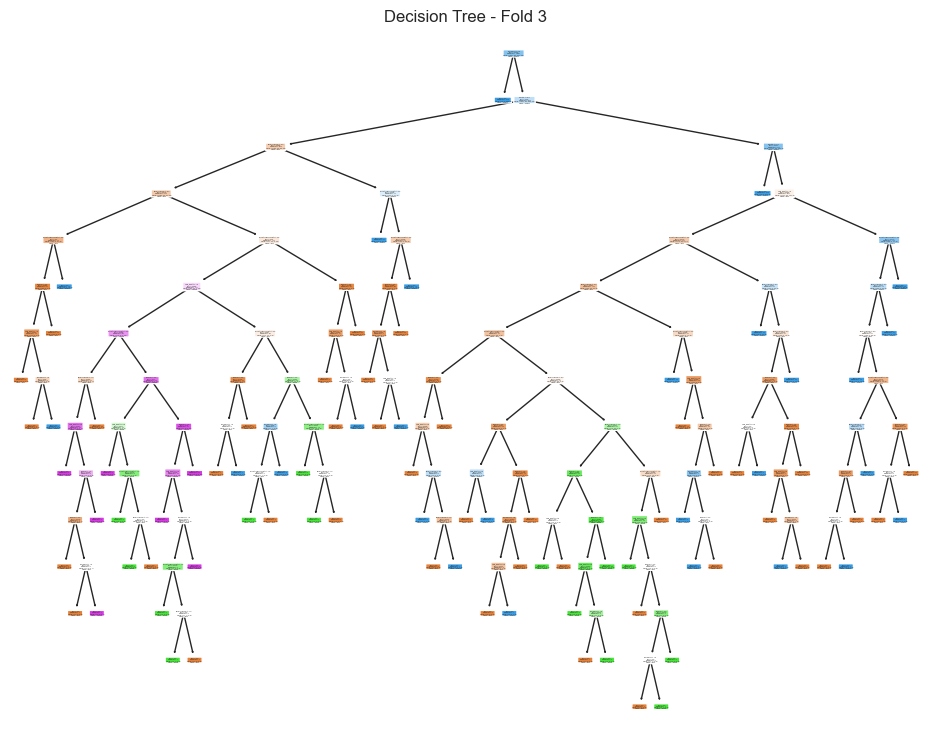

Classification Report for Fold:
              precision    recall  f1-score   support

         acc       0.95      0.92      0.93        76
        good       0.86      0.86      0.86        14
       unacc       0.98      0.99      0.99       242
       vgood       1.00      1.00      1.00        13

    accuracy                           0.97       345
   macro avg       0.95      0.94      0.94       345
weighted avg       0.97      0.97      0.97       345

-----


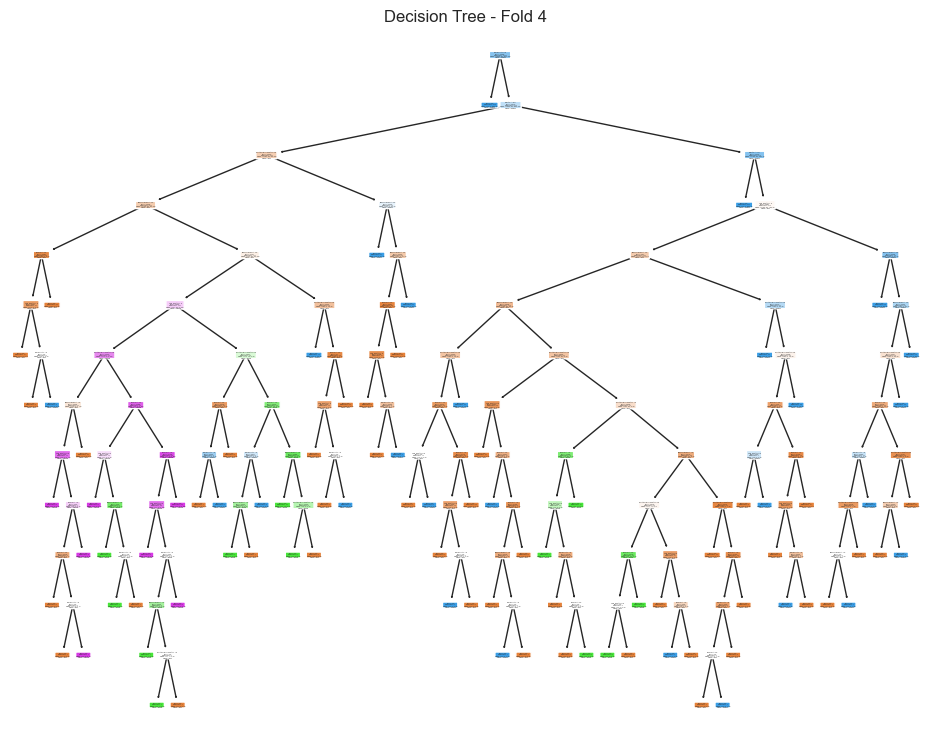

Classification Report for Fold:
              precision    recall  f1-score   support

         acc       0.94      0.95      0.94        77
        good       0.93      0.93      0.93        14
       unacc       0.99      0.99      0.99       241
       vgood       1.00      0.92      0.96        13

    accuracy                           0.97       345
   macro avg       0.96      0.95      0.95       345
weighted avg       0.97      0.97      0.97       345

-----


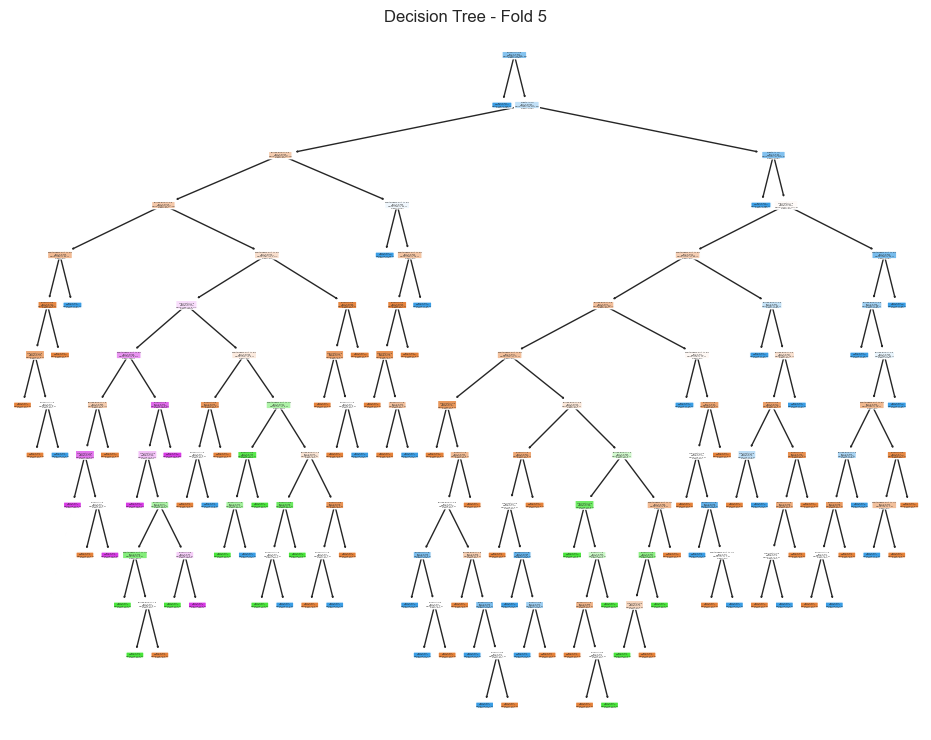

Overall Classification Report:
              precision    recall  f1-score   support

         acc       0.94      0.95      0.95       384
        good       0.94      0.90      0.92        69
       unacc       0.99      0.99      0.99      1209
       vgood       0.95      0.95      0.95        65

    accuracy                           0.98      1727
   macro avg       0.96      0.95      0.95      1727
weighted avg       0.98      0.98      0.98      1727

Mean Accuracy: 0.9768384481760278


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import classification_report

# Assuming X and y are your features and target variable

label_encoder = LabelEncoder()

# Apply Label Encoding to categorical columns
X_encoded = X.apply(lambda col: label_encoder.fit_transform(col) if col.dtype == 'object' else col)

# Assign the encoded features back to X
X = X_encoded

dt = DecisionTreeClassifier()
s_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get predicted labels for each fold
y_pred = cross_val_predict(dt, X, y, cv=s_kfold)

# Display classification report for each fold
for fold_num, (train_index, test_index) in enumerate(s_kfold.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    dt.fit(X_train, y_train)
    y_fold_pred = dt.predict(X_test)
    
    print("Classification Report for Fold:")
    print(classification_report(y_test, y_fold_pred))
    print("-----")
    # Plot the decision tree
    plt.figure(figsize=(40, 20))
    plt.subplot(2, 3, fold_num + 1)  # Adjust subplot based on the number of folds
    plot_tree(dt, filled=True, feature_names=X.columns, class_names=dt.classes_, rounded=True)
    plt.title(f"Decision Tree - Fold {fold_num + 1}")
    plt.show()


# Display overall classification report
print("Overall Classification Report:")
print(classification_report(y, y_pred))


# Calculate and print the mean accuracy
mean_accuracy = accuracy_score(y, y_pred)
print("Mean Accuracy:", mean_accuracy)


## General Notes:

#### Class Imbalance:

Both models seem to handle class imbalance relatively well, as indicated by high precision, recall, and F1-scores for each class.
#### Stratified K-Fold Cross-Validation:

- The cross-validated model provides a more robust evaluation by considering different subsets of the data for training and testing.
- The models generally perform well, especially on the majority class ('unacc').
- Class 'good' seems to have a lower F1 score in the Stratified K-Fold model.
The use of Stratified K-Fold may have a slight impact on performance, but it's not dramatic.

#### Recommendation:

Given the reasonable performance metrics, the original decision tree classifier appears effective for this dataset. The use of Stratified K-Fold CV might lead to a some improvements in this particular case.